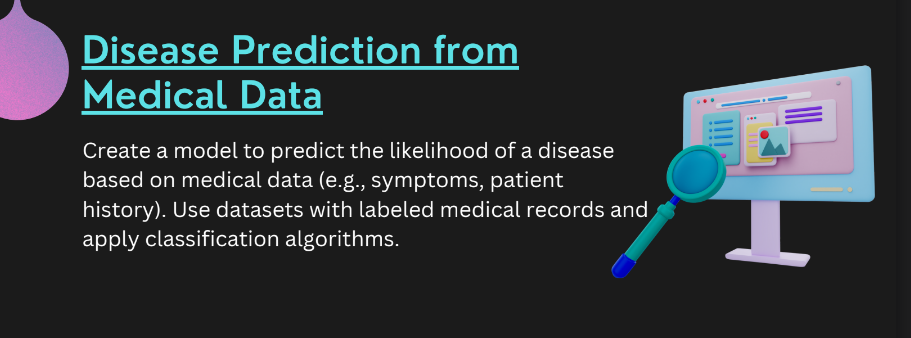

**Import Libraries**

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

**Loading Dataset**

In [4]:
# Load the dataset
data = pd.read_csv('medical_dataset.csv')

# Display the first few rows of the dataset
data.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328.0,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265.0,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205.0,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450.0,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458.0,Urgent,2022-10-09,Penicillin,Abnormal


**Data Pre-processing**

In [5]:
# Handle missing values
data.fillna(method='ffill', inplace=True)

# List of categorical columns
categorical_columns = [
    'Name', 'Gender', 'Blood Type', 'Doctor', 'Hospital',
    'Insurance Provider', 'Room Number', 'Admission Type',
    'Medication', 'Test Results'
]

# Encode categorical columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Convert date columns to numerical values
data['Date of Admission'] = pd.to_datetime(data['Date of Admission']).astype(int) / 10**9
data['Discharge Date'] = pd.to_datetime(data['Discharge Date']).astype(int) / 10**9

# Define feature columns and target column
X = data.drop('Medical Condition', axis=1)  # Features
y = data['Medical Condition']  # Target

# Encode the target column
le_target = LabelEncoder()
y = le_target.fit_transform(y)




**Training and testing**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model fixing**

In [6]:
# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Predicting the results**

In [7]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 15.57%
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.19      0.19       250
           1       0.16      0.17      0.16       241
           2       0.18      0.15      0.16       246
           3       0.12      0.16      0.14       205
           4       0.11      0.12      0.11       221
           5       0.17      0.15      0.16       224

    accuracy                           0.16      1387
   macro avg       0.16      0.15      0.16      1387
weighted avg       0.16      0.16      0.16      1387

Confusion Matrix:
[[47 43 35 45 38 42]
 [43 40 38 38 47 35]
 [26 48 37 57 48 30]
 [45 33 34 32 42 19]
 [38 39 37 46 26 35]
 [40 42 29 38 41 34]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the best model
best_clf = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_clf.predict(X_test)

# Evaluate the best model's accuracy
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {best_accuracy * 100:.2f}%")


Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
# Save the trained model
joblib.dump(best_clf, 'disease_prediction_model.pkl')

# Save the label encoder for the target
joblib.dump(le_target, 'label_encoder.pkl')
